In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC,SVR

In [149]:
# Load dataset
df = pd.read_csv('datasets/housedata.csv')

In [150]:
# Review the data
df.head()

,location,#bedrooms,#bathrooms,house area in 1000 square feet,"1 if condo, 0 otherwise",selling price in 1000 dollars
0,2,2,2,941,1,94905
1,2,3,2,1146,0,98937
2,2,3,2,909,0,100309
3,3,3,2,1289,0,106250
4,3,3,1,1020,0,107502


In [151]:
df.columns

Index(['location ', '#bedrooms', '#bathrooms',
       'house area in 1000 square feet', '1 if condo, 0 otherwise ',
       'selling price in 1000 dollars'],
      dtype='object')

In [152]:
df = df.rename(columns={
    "location ":"location",
    "#bedrooms":"bedrooms",
    "#bathrooms":"bathrooms", 
    "house area in 1000 square feet":"house_area_1000_sqr_ft",
    "1 if condo, 0 otherwise ":"1-condo_0-otherwise",
    "selling price in 1000 dollars":"selling_price_in_1000_dollars"
})

In [153]:
df.dtypes

location                          int64
bedrooms                          int64
bathrooms                         int64
house_area_1000_sqr_ft            int64
1-condo_0-otherwise               int64
selling_price_in_1000_dollars    object
dtype: object

In [154]:
# Remove the ';' symbol from selling price column and convert it to numeric
df['selling_price_in_1000_dollars'] = df['selling_price_in_1000_dollars'].replace({r'[^\d.]':''}, regex=True)
df['selling_price_in_1000_dollars'] = pd.to_numeric(df['selling_price_in_1000_dollars'], errors='coerce')

In [155]:
df.describe()

,location,bedrooms,bathrooms,house_area_1000_sqr_ft,1-condo_0-otherwise,selling_price_in_1000_dollars
count,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000
mean,2.583979,3.240310,1.947028,1583.179587,0.050388,228769.447028
std,0.701174,0.819635,0.634119,636.594058,0.218885,112855.088965
min,1.000000,1.000000,1.000000,539.000000,0.000000,55422.000000
25%,2.000000,3.000000,2.000000,1146.000000,0.000000,150000.000000
50%,3.000000,3.000000,2.000000,1419.500000,0.000000,208000.000000
75%,3.000000,4.000000,2.000000,1836.000000,0.000000,284841.250000
max,4.000000,6.000000,5.000000,4303.000000,1.000000,699000.000000


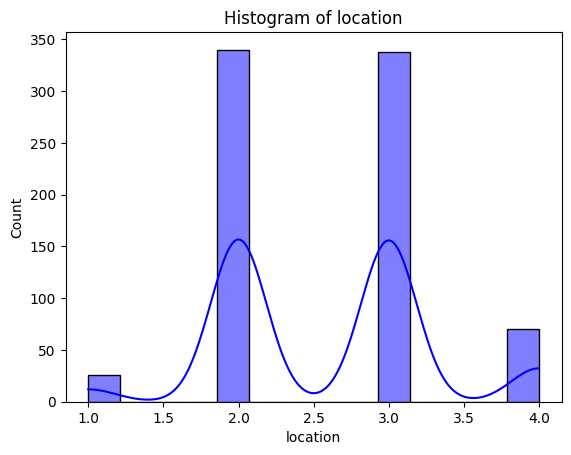

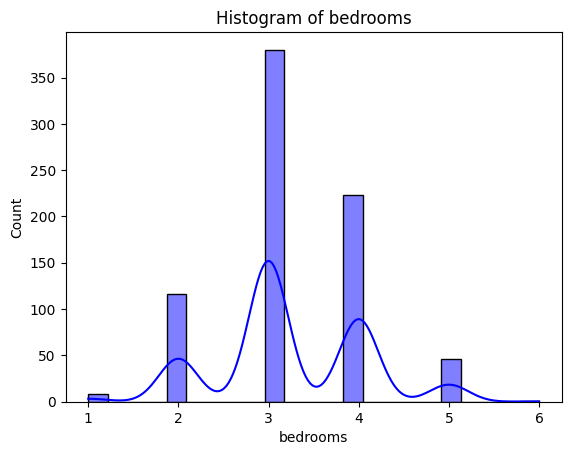

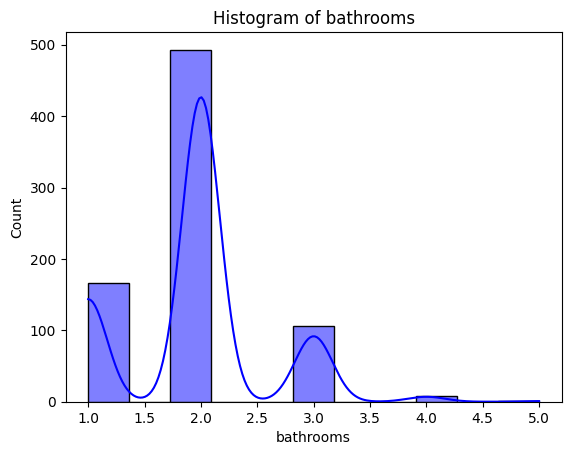

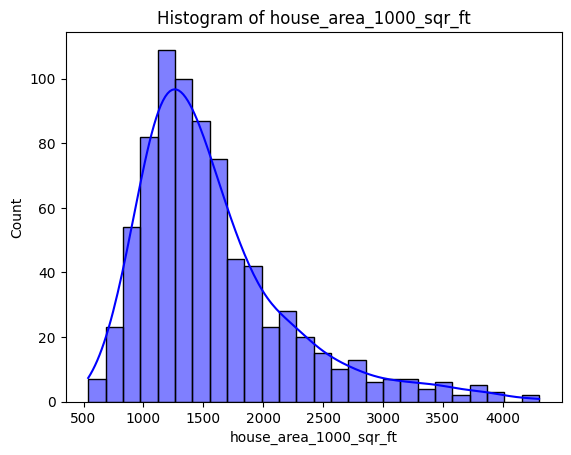

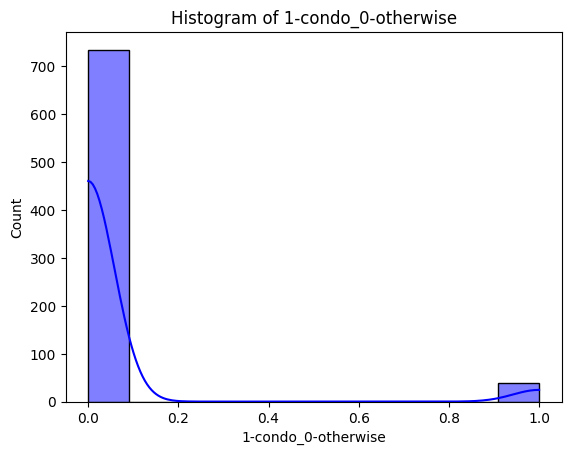

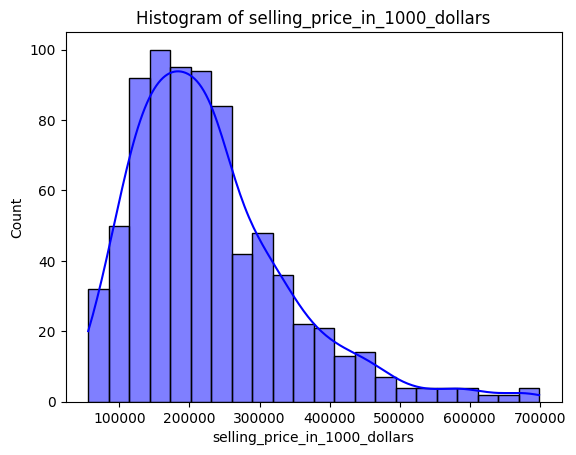

In [157]:
# Create histograms to see the distribution
for column in df.columns:
    sns.histplot(data=df, x=column, kde=True, color='b')
    plt.title(f"Histogram of {column}")
    plt.show()

In [12]:
# Log house area and selling price because they have skewness distribution
df['log_house_area']=np.log(df['house_area_1000_sqr_ft'])
df['log_selling_price']=np.log(df['selling_price_in_1000_dollars'])

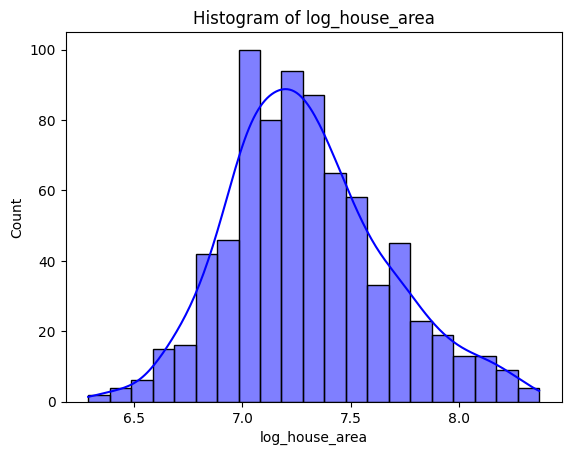

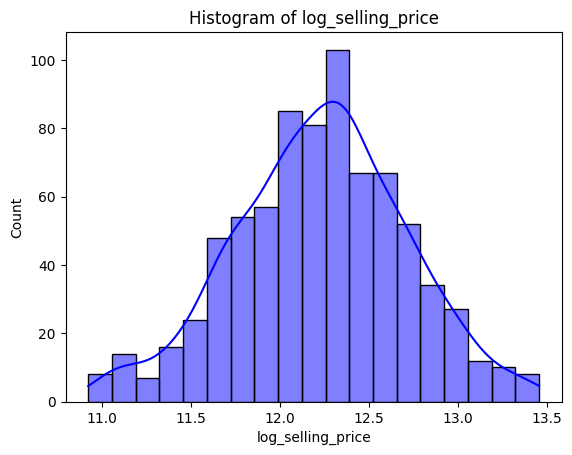

In [13]:
log_columns = df[['log_house_area', 'log_selling_price']]
for column in log_columns:
    sns.histplot(data=log_columns, x=column, kde=True, color='b')
    plt.title(f"Histogram of {column}")
    plt.show()

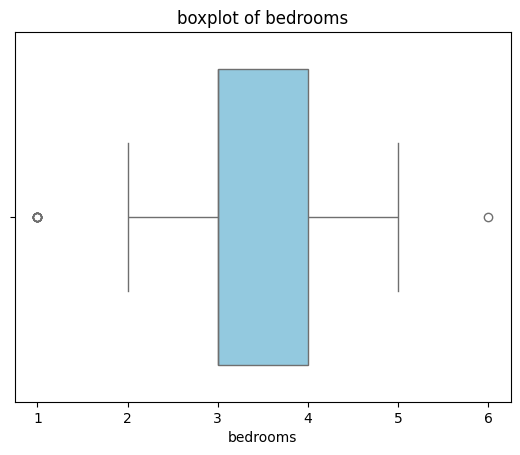

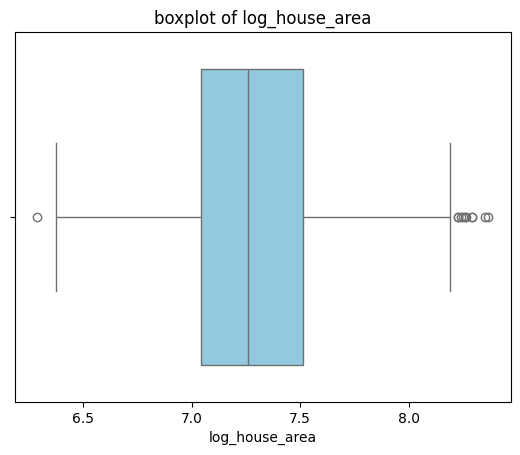

column:
 bedrooms
 lower_bound:
 1.5
 upper_bound:
 5.5
 Outliers:
      location  bedrooms  bathrooms  house_area_1000_sqr_ft  \
30          2         1          1                     760   
143         3         1          1                     722   
145         3         1          1                     722   
287         3         1          1                     625   
475         2         1          1                     846   
551         2         1          1                     984   
613         3         6          3                    2555   
667         3         1          1                     611   
680         2         1          1                     682   

     1-condo_0-otherwise  selling_price_in_1000_dollars  log_house_area  \
30                     1                         150000        6.633318   
143                    1                          98000        6.582025   
145                    1                         100000        6.582025   
287        

In [14]:
# Box plots to detect outliers
columns = df[['bedrooms', 'log_house_area']]
for column in columns:
    sns.boxplot(data=columns, x=column, color='skyblue')
    plt.title(f"boxplot of {column}")
    plt.show()

for i in columns: 
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    outliers = df.loc[(df[i] < lower_bound) | (df[i] > upper_bound)]
    print(f"column:\n {i}\n lower_bound:\n {lower_bound}\n upper_bound:\n {upper_bound}\n Outliers:\n {outliers}\n")

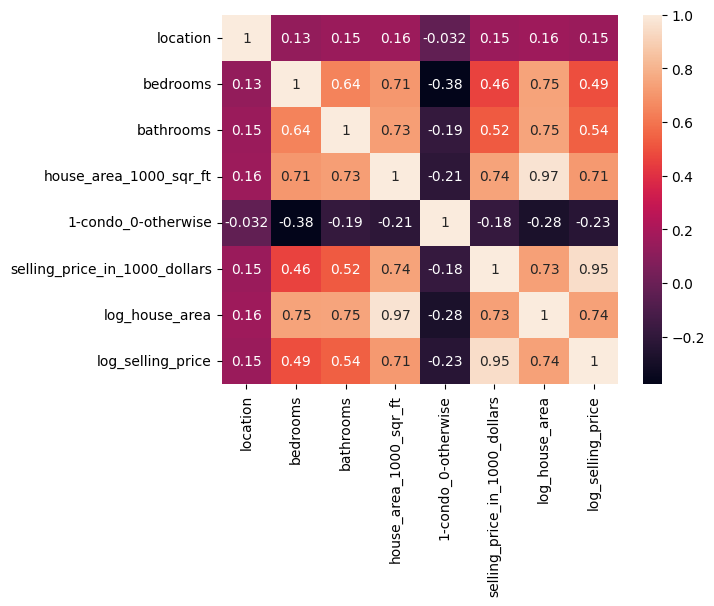

In [15]:
# Correlation Matrix
sns.heatmap(df.corr(), annot=True)
plt.show()

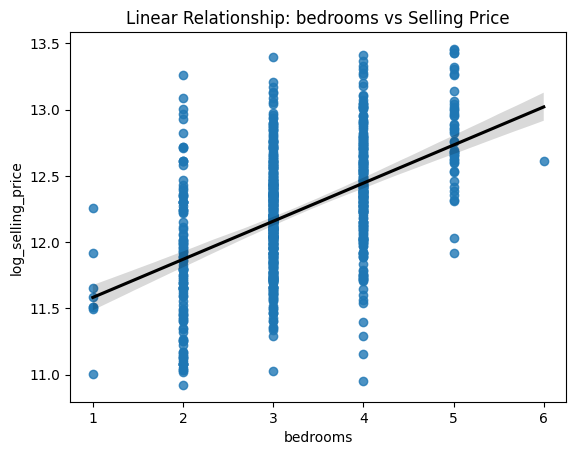

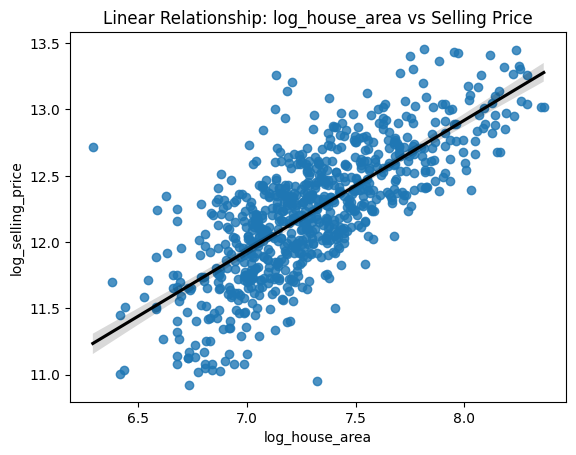

In [16]:
# Plot data and a linear regression model fit.
for column in columns:
    sns.regplot(x=column, y='log_selling_price', data=df, line_kws={'color': 'black'})
    plt.title(f'Linear Relationship: {column} vs Selling Price')
    plt.show()

In [17]:
# Create a Lasso Model and make prediction of prices for all the houses
X = df[['bedrooms', 'log_house_area']]
y = df['log_selling_price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=79/774, random_state=42)

model = Lasso(alpha=0.1)
model.fit(X_train, y_train)

print(model.coef_, model.intercept_)

[0.         0.26167127] 12.220642267618127


In [18]:
y_pred = model.predict(X_scaled)

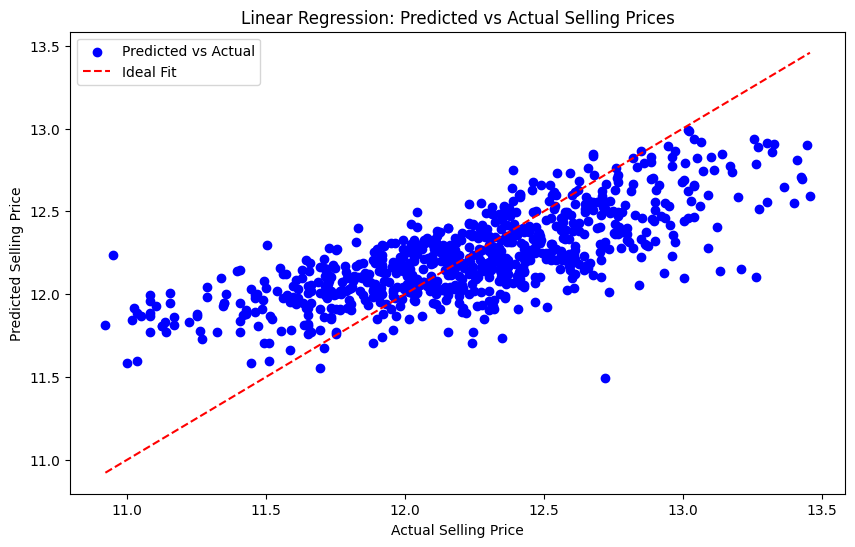

In [19]:
# Visualize results
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Linear Regression: Predicted vs Actual Selling Prices')
plt.legend()
plt.show()

In [20]:
# Create a Linear Model and make prediction of prices for all the houses
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

print(linear_model.coef_, linear_model.intercept_)

[-0.06013147  0.4038424 ] 12.221847768906773


In [69]:
y_linear_pred = linear_model.predict(X_scaled)

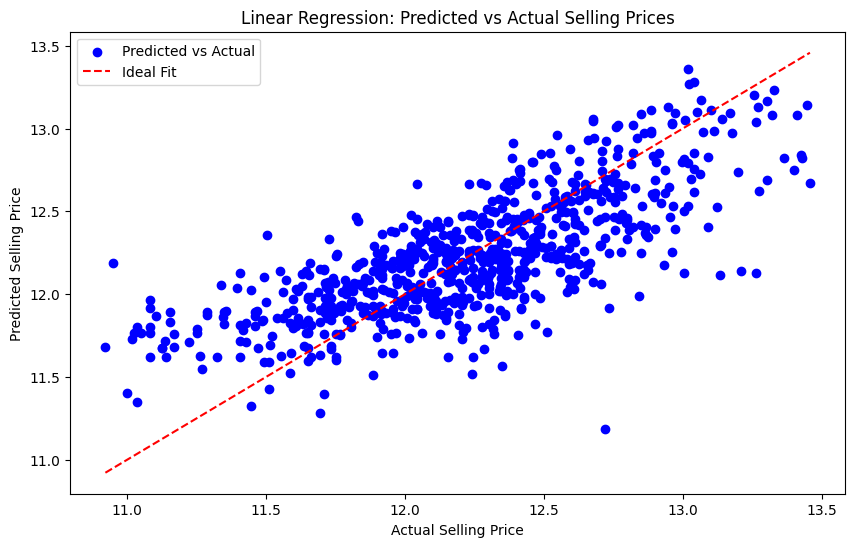

In [70]:
# Visualize results
plt.figure(figsize=(10, 6))
plt.scatter(y, y_linear_pred, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Linear Regression: Predicted vs Actual Selling Prices')
plt.legend()
plt.show()

In [158]:
# Evaluation of Lasso Model
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R2 Score:", r2)
n = len(y)  # Total number of data points
k = X.shape[1]  # Number of independent variables

# Calculate Adjusted R-squared
adjusted_r_squared = 1 - (1 - r2) * (n - 1) / (n - k - 1)

print("Adjusted R-squared:", adjusted_r_squared)

Mean Squared Error (MSE): 0.11378532237247008
Root Mean Squared Error (RMSE): 0.33732080038513795
R2 Score: 0.5095631483866122
Adjusted R-squared: 0.5082909386548006


In [159]:
# Evaluation of Linear Model
mse = mean_squared_error(y, y_linear_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_linear_pred)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R2 Score:", r2)
n = len(y)  # Total number of data points
k = X.shape[1]  # Number of independent variables

# Calculate Adjusted R-squared
adjusted_r_squared = 1 - (1 - r2) * (n - 1) / (n - k - 1)

print("Adjusted R-squared:", adjusted_r_squared)

Mean Squared Error (MSE): 0.10263626352518745
Root Mean Squared Error (RMSE): 0.32036894906527297
R2 Score: 0.5576177586430631
Adjusted R-squared: 0.5564702041907753


In [83]:
# Test the model with the new data. I use the linear model because i see that it workes more efficient than Lasso 
test_data = pd.DataFrame({ 'house_area': [846, 1324, 1150, 3037, 3984],
         'bedrooms': [1, 2, 3, 4, 5],
         'actual_price': [115000, 234500, 198000, 528000, 572500] })
test_data['log_house_area'] = np.log(test_data['house_area'])
test_data['log_selling_price'] = np.log(test_data['actual_price'])

X1 = test_data[['log_house_area', 'bedrooms']]
y1 = test_data['log_selling_price']

X1_scaled = scaler.fit_transform(X1)
predicted_test_prices = linear_model.predict(X1_scaled)

test_data['predicted_prices'] = predicted_test_prices
test_data[['log_selling_price', 'predicted_prices']]

,log_selling_price,predicted_prices
0,11.652687,11.722534
1,12.365211,11.962855
2,12.196022,12.264966
3,13.176852,12.450378
4,13.257768,12.709219


In [81]:
# Find RMSE for train and test data. Values are close enough, so the model seems to has reasonable generalization ability
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"RMSE for Training Data: {train_rmse}")
print(f"RMSE for Test Data: {test_rmse}")

RMSE for Training Data: 0.32065204392020846
RMSE for Test Data: 0.31786756548299905


In [115]:
# Create the df with the basis functions
basis_functions = pd.DataFrame(index=df.index)
basis_functions['f1']= 1
basis_functions['f2'] = df['house_area_1000_sqr_ft']
basis_functions['f3'] = np.maximum(df['house_area_1000_sqr_ft'] - 1.5, 0)
basis_functions['f4'] = df['bedrooms']
basis_functions['f5'] = df['1-condo_0-otherwise']
basis_functions['f6'] = df['location'].apply(lambda x: 1 if x == 2 else 0)
basis_functions['f7'] = df['location'].apply(lambda x: 1 if x == 3 else 0)
basis_functions['f8'] = df['location'].apply(lambda x: 1 if x == 4 else 0)
basis_functions['selling_price_in_1000_dollars'] = df['selling_price_in_1000_dollars']

basis_functions.head()

,f1,f2,f3,f4,f5,f6,f7,f8,selling_price_in_1000_dollars
0,1,941,939.5,2,1,1,0,0,94905
1,1,1146,1144.5,3,0,1,0,0,98937
2,1,909,907.5,3,0,1,0,0,100309
3,1,1289,1287.5,3,0,0,1,0,106250
4,1,1020,1018.5,3,0,0,1,0,107502


In [116]:
# Log features which contain values about house area and the selling price
basis_functions['log_f2']=np.log(basis_functions['f2'])
basis_functions['log_f3']=np.log(basis_functions['f3'])
basis_functions['log_selling_price']=np.log(basis_functions['selling_price_in_1000_dollars'])
basis_functions

,f1,f2,f3,f4,f5,f6,f7,f8,selling_price_in_1000_dollars,log_f2,log_f3,log_selling_price
0,1,941,939.5,2,1,1,0,0,94905,6.846943,6.845348,11.460632
1,1,1146,1144.5,3,0,1,0,0,98937,7.044033,7.042723,11.502239
2,1,909,907.5,3,0,1,0,0,100309,6.812345,6.810694,11.516011
3,1,1289,1287.5,3,0,0,1,0,106250,7.161622,7.160458,11.573550
4,1,1020,1018.5,3,0,0,1,0,107502,6.927558,6.926086,11.585265
...,...,...,...,...,...,...,...,...,...,...,...,...
769,1,2280,2278.5,4,0,0,1,0,232425,7.731931,7.731273,12.356323
770,1,1477,1475.5,3,0,0,1,0,234000,7.297768,7.296752,12.363076
771,1,1216,1214.5,3,0,1,0,0,235000,7.103322,7.102088,12.367341
772,1,1685,1683.5,4,0,0,1,0,235301,7.429521,7.428630,12.368621


In [117]:
# Create and train the new model
X_new = basis_functions[['f1', 'log_f2', 'log_f3', 'f4', 'f5', 'f6', 'f7', 'f8']]
y_new = df['log_selling_price']

X_new_scaled = scaler.fit_transform(X_new)

X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new_scaled, y_new, test_size=79/774, random_state=42)

new_model = LinearRegression()
new_model.fit(X_new_train, y_new_train)
y_new_pred = new_model.predict(X_new_scaled)

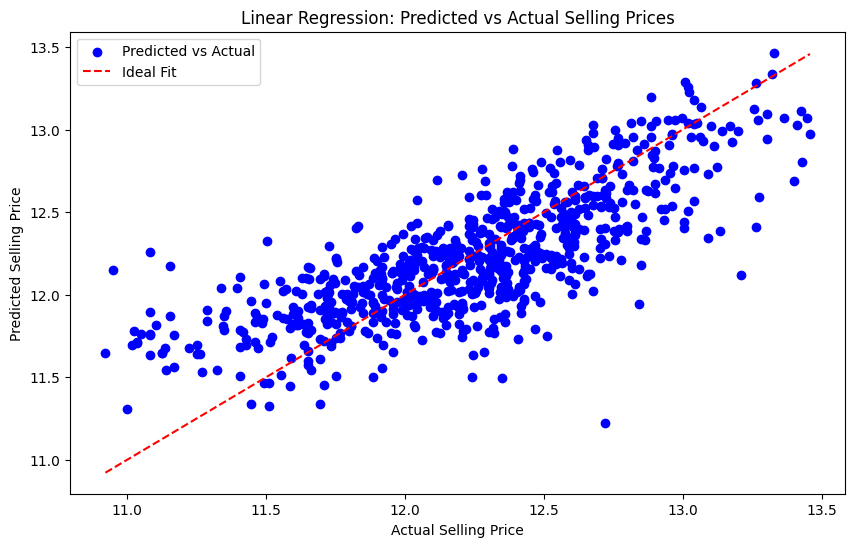

In [118]:
# Prediction for all 774 houses
plt.figure(figsize=(10, 6))
plt.scatter(y_new, y_new_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_new.min(), y_new.max()], [y_new.min(), y_new.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Linear Regression: Predicted vs Actual Selling Prices')
plt.legend()
plt.show()

In [119]:
# Evaluation of new Linear Model
mse = mean_squared_error(y_new, y_new_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_new, y_new_pred)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R2 Score:", r2)
n = len(y)  # Total number of data points
k = X_new.shape[1]  # Number of independent variables

# Calculate Adjusted R-squared
adjusted_r_squared = 1 - (1 - r2) * (n - 1) / (n - k - 1)

print("Adjusted R-squared:", adjusted_r_squared)

Mean Squared Error (MSE): 0.09195067155210596
Root Mean Squared Error (RMSE): 0.3032336913209117
R2 Score: 0.6036747366050232
Adjusted R-squared: 0.5995301586871673


In [126]:
# Cross Validation for the above 2 models. Model 2 seems to work a little better than the first one. 
lm = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Cross-validation for the first model
scores_model_1 = cross_val_score(lm, X_train, y_train, cv=kf)

# Cross-validation for the second model
scores_model_2 = cross_val_score(lm, X_new_train, y_train, cv=kf)

print("Model 1 scores: ", scores_model_1)
print("Mean score of Model 1: ", np.mean(scores_model_1))

print("Model 2 scores: ", scores_model_2)
print("Mean score of Model 2: ", np.mean(scores_model_2))

Model 1 scores:  [0.61725271 0.46540842 0.5253429  0.59064457 0.59078385]
Mean score of Model 1:  0.5578864894725278
Model 2 scores:  [0.6483842  0.52377796 0.55119356 0.6006283  0.657004  ]
Mean score of Model 2:  0.5961976037290329


In [140]:
# Calculate residuals
y_linear_pred1 = linear_model.predict(X_test)
y_linear_pred2 = new_model.predict(X_new_test)
residual_model1 = y_test - y_linear_pred1
residual_model2 = y_new_test - y_linear_pred2

residuals = [residual_model1, residual_model2]
predictions = [y_linear_pred1, y_linear_pred2]
titles = ["Model 1", "Model 2"]


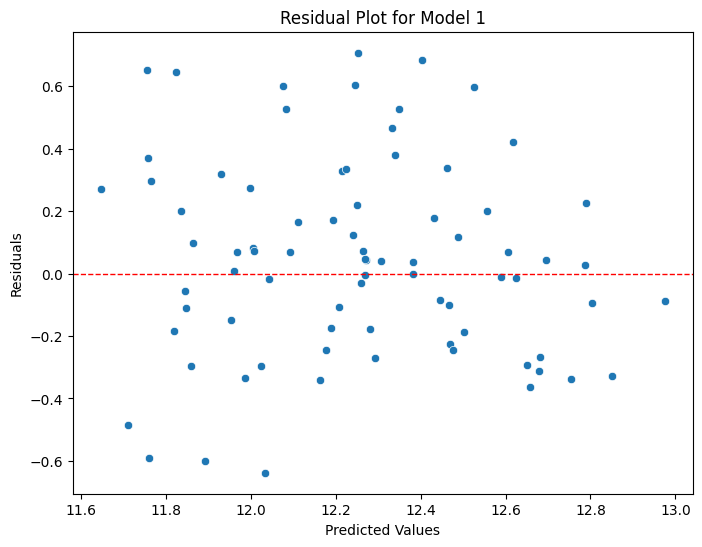

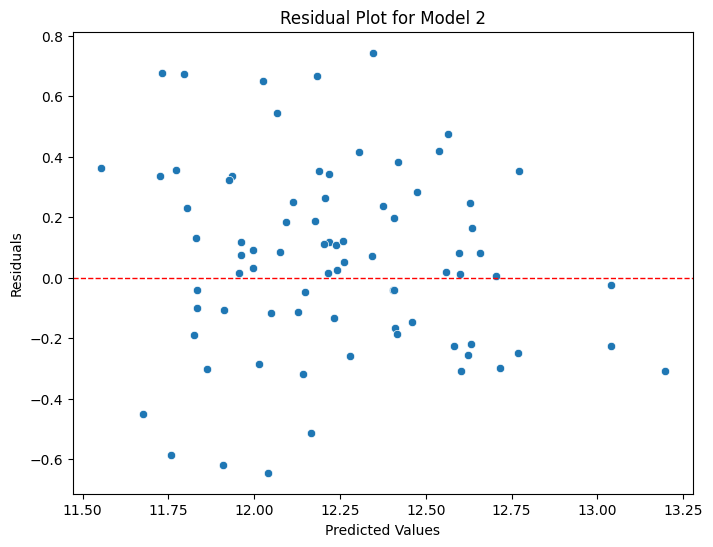

In [141]:
# Plot appropriate plots to visualize the performance of each model.
for residual,title,prediction in zip(residuals,titles,predictions):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=prediction, y=residual)
    plt.axhline(0, color='red', linestyle='--', linewidth=1)
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"Residual Plot for {title}")
    plt.show()

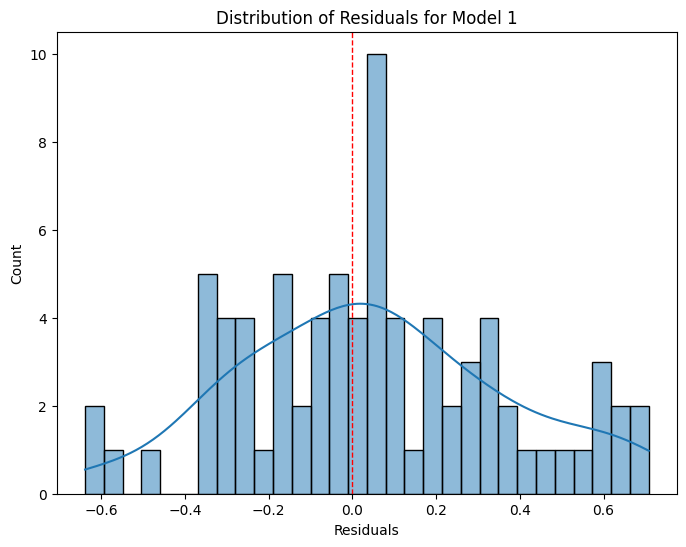

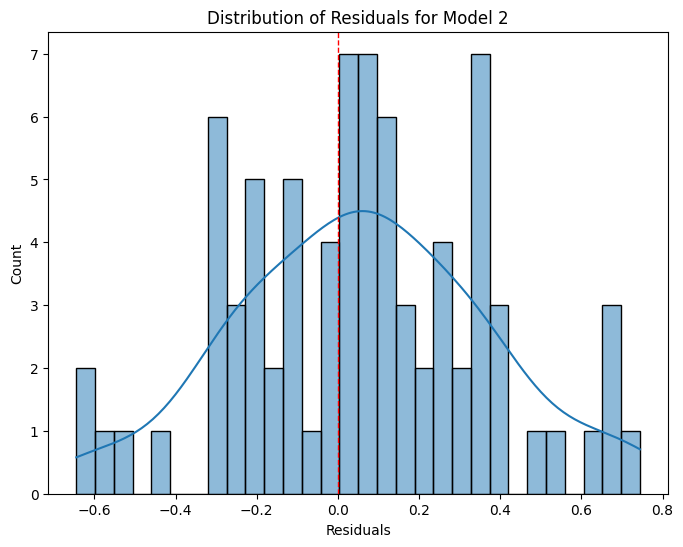

In [144]:
for residual,title in zip(residuals,titles):
    plt.figure(figsize=(8, 6))
    sns.histplot(residual, kde=True, bins=30)
    plt.axvline(0, color='red', linestyle='--', linewidth=1)
    plt.xlabel("Residuals")
    plt.title(f"Distribution of Residuals for {title}")
    plt.show()

To come to a final conclusion, the models work well but not ideally. The average score of the first model shows that it explains 55% of the variance of the target variable, while the second model explains 59% of the variance, performing slightly better. We can come to the same conclusion about the operation of the models by observing the last diagrams.